# Oppgave 1: Eulers metode for koblede differensialligninger

### Oppsummering eulers metode

Som vi lærte om i øving 3, tilbyr Eulers metode en fremgangsmåte for å få en datamaskin til å løse et initialverdiproblem numerisk. Gitt en differensialligning på formen $y' = f(x, y)$ og en initialverdi $y(0) = y(x_0)$, så kan man finne en *tilnærmet verdi* for $y(x)$ etter et kort intervall $h$. Dette gjøres ved å følge den rette linjen som tangerer funksjonen $y(x)$ i $x=0$ helt til vi kommer til $x=h$, hvorpå vi repeterer prossessen. Det hele kan oppsummeres med formelen nedenfor som angir utregningene som skal til for å fullføre *ett steg* i utregningen av $y(t)$


$$ y_{n+1} = y_{n} + h\cdot f(x_n, y_n)$$

#### Eksempel:

Lag et plot av løsningen til differensialligningen $\frac{dy(x)}{dx} + y(x) = 0$ gitt en initialverdi $y(0) = 10$ og en skrittlengde $h = 0.1$ for intervallet $0 \leq x \leq 5$:

1. Finn formelen for eulers metode med utgangspunkt i differensialligningen:
$$
\begin{align}
y' + y &= 0\\
y' &= -y = f(x, y)
\end{align}
$$

$$
\begin{align}
y_{n+1} &= y_{n} + h\cdot f(x_n, y_n)\\
y_{n+1} &= y_n - h\cdot y_n
\end{align}
$$

2. Implementér metoden med Python

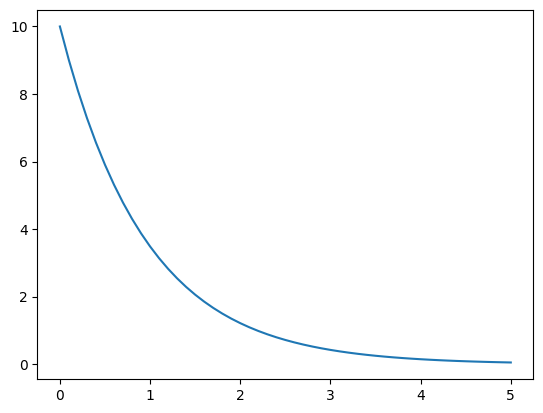

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parametre for den numeriske utregningen
duration = 5 # Antall sekund til slutten av "simuleringen"
h = 0.1 # Skrittlengde

steps = int(duration/h) # Antall iterasjoner

# Klargjør arrayene x og y
x = np.linspace(0, duration, steps+1)
y = np.zeros(steps+1)

# Sett initialverdier
y[0] = 10

# Utfør eulers metode
for n in range(steps):
    y[n+1] = y[n] - h*y[n]

# Laget plot av funksjonen y(x)
plt.plot(x, y)

I kodeeksempelet ser vi at selve implementasjonen av eulers metode er nokså grei, og koker ned til én kodelinje inni en for-løkke. Mesteparten av arbidet ligger i "forarbeidet" der man setter initialbetingelser og parametre til eulers metode. Men, hva skjer dersom $x$ og $y$ er vektororer istedenfor vanlige tallvariabler?

### Eulers metode og koblede differensialligninger

Ett vanlig bruksområde for Eulers metode er å simulere fysikk, og her blir det fort nødvendig å arbeide i mer enn én dimensjon. Ta for eksempel funksjonene $x(t)$, $y(t)$ og $z(t)$ som alle beskriver den tidsavhengige posisjonen til et objekt i én av tre dimensjoner. Forholdet mellom $x$, $y$ og $z$ vil da kunne beskrives med et sett koblede differensialligninger som kan skrives på matriseform:

$$
\begin{align}
\begin{bmatrix} x' \\ y' \\ z' \end{bmatrix} &=
\begin{bmatrix} a_{11} & a_{12} & a_{13} \\ a_{21} & a_{22} & a_{23} \\ a_{31} & a_{32} & a_{33} \end{bmatrix} \cdot 
\begin{bmatrix} x \\ y \\ z \end{bmatrix} \\ &\text{eller:} \\
\begin{bmatrix} x' \\ y' \\ z' \end{bmatrix} &= A \cdot
\begin{bmatrix} x \\ y \\ z \end{bmatrix}
\end{align}
$$

Dersom vi definerer posisjonen som en vektor $\vec{p} = \begin{bmatrix} x \\ y \\ z \end{bmatrix}$ blir dette:
$$ \vec{p'} = A\cdot \vec{p}$$

Denne formelen kan vi nå bruke i Eulers metode, noe som gir:

$$
\begin{align}
\vec{p}_{n+1} &= \vec{p}_{n} + h\cdot f(t_n, \vec{p}_n)\\
&=  \vec{p}_{n} + h\cdot A\cdot \vec{p} 
\end{align}
$$



## Oppgave:
Du skal i denne oppgaven bruke Eulers metode til å finne en tilnærmet løsning på den koblede differensiallikningen<br><br>
$x'=-0.250 \, x-0.250 \, y+0.250 \, z$<br>
$y'=-0.375 \, x-0.125 \, y-0.375 \, z$<br>
$z'=-0.125 \, x+0.125\, y+0.125 \, z$<br><br>
med initialbetingelsene $x(0)=10,y(0)=0$ og $z(0)=-5$.<br><br>


### a)

Bruk skrittlengde $h=0.1$, og regn ut $x(4)$, $y(4)$ og $z(4)$ i kodecellen nedenfor ved hjelp av Eulers metode. Verdiene skal du lagre i variablene `x_n`, `y_n` og `z_n` henholdsvis.

*PS! Husk at matrisemultiplikasjon utføres med operatoren `@` i Python*<br>
*PPS! Ikke rund av tallverdiene*

In [3]:
# Skriv programmet her:

h = 0.1 # Skrittlengde
duration = 4.0 # Varighet

#-------------------------------------
# SKRIV DIN KODE HER:
#-------------------------------------

def euler(A, x0, h, duration):
    steps = int(duration/h)

    x = x0

    for i in range(steps):
        x = x + h*A@x
    
    return x

A = np.array([
    [-0.250, -0.250, 0.250],
    [-0.375, -0.125, -0.375],
    [-0.125, 0.125, 0.125],
])

x0 = np.array([10, 0, -5])
x = euler(A, x0, h, duration)

x_n, y_n, z_n = x

In [4]:
print(f"Ved tid t=4 sekund er: x={x_n:.3f}, y={y_n:.3f} og z={z_n:.3f}")

Ved tid t=4 sekund er: x=-2.889, y=6.262 og z=-10.420



### b) 

Kopier løsningen fra deloppgave **a)** til kodecellen nedenfor, og utvid programmet slik at det lager et plot av løsningsfunsjonene $x(t),y(t)$ og $z(t)$ for $0 \le t \le 4$.<br>
Benytt henholdsvis svart, blå og rød linje for de tre grafene.

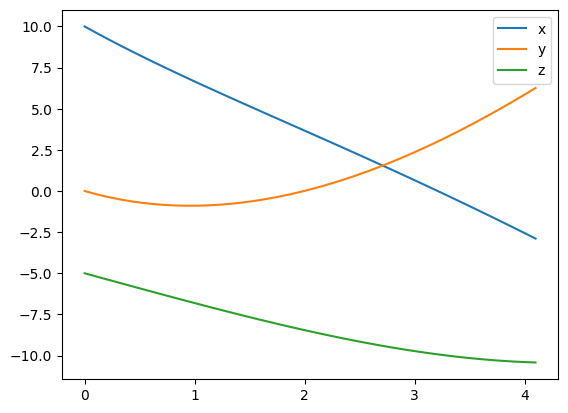

In [6]:
import numpy as np
import matplotlib.pyplot as plt

#-------------------------------------
# SKRIV DIN KODE HER:
#-------------------------------------

def euler_series(A, x0, h, duration):
    steps = int(duration/h)

    x = [x0]

    for i in range(steps):
        x.append(x[i] + h*A@x[i])
    
    return np.array(x)

def plot_vec(x, h, labels):
    t = np.linspace(0, len(x)*h, len(x))

    for i in range(len(labels)):
        plt.plot(t, x[:, i], label=labels[i])

    plt.legend()

x = euler_series(A, x0, h, duration)
plot_vec(x, h, ["x", "y", "z"])

*Kurvene til $x(t)$, $y(t)$ og $z(t)$ burde se noe [slik](Figurer/oppg1b_fasit.png) ut.*